In [1]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 56 (delta 9), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (56/56), 7.96 MiB | 5.89 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [18]:
import pandas as pd
df = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_train.csv")
print(df.shape)
print()
df = df.dropna()
print(df.dtypes)



(3180, 17)

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose            float64
TenYearCHD           int64
dtype: object


<Axes: xlabel='age', ylabel='Density'>

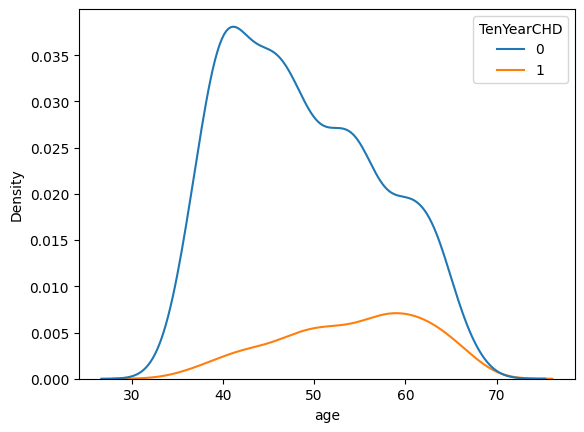

In [24]:
import seaborn as sns
sns.kdeplot(data=df,x='age',hue='TenYearCHD')

<Axes: xlabel='cigsPerDay', ylabel='Density'>

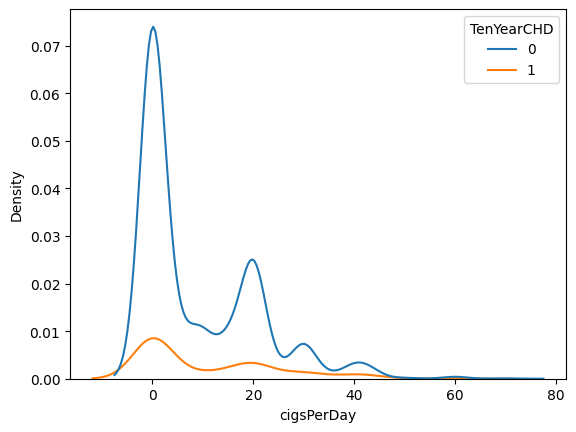

In [23]:
sns.kdeplot(data=df,x='cigsPerDay',hue='TenYearCHD')